In [6]:
import os
from pathlib import Path
from PIL import Image  # 이미지 핸들링 📖https://pillow.readthedocs.io/
import pandas as pd   # 데이터프레임 📖https://pandas.pydata.org/
import matplotlib.pyplot as plt
import random

# 1) 이미지 경로 수집
image_root = Path("/Users/gim-yonghyeon/Documents/GitHub/image-search/images")
exts = (".jpg", ".jpeg", ".png", ".bmp", ".gif")
paths = [p for p in image_root.rglob("*") if p.suffix.lower() in exts]

print(f"총 이미지 수: {len(paths)}개")

총 이미지 수: 12813개


In [7]:
# 2) 메타데이터 수집
records = []
for p in paths:
    try:
        with Image.open(p) as img:
            w, h = img.size
            records.append({
                "filename": p.name,
                "format": img.format,
                "width": w,
                "height": h,
                "aspect_ratio": round(w/h, 2)
            })
    except Exception as e:
        print(f"읽기 실패: {p.name} ({e})")

df = pd.DataFrame(records)

In [8]:
# 3) 기초 통계 & 헤드 출력
display(df.head())
print(df.describe())

,filename,format,width,height,aspect_ratio
0,08_081_08011004_160549252111749_1.jpg,JPEG,4000,3000,1.33
1,08_081_08011007_161095954827769_1.jpeg,JPEG,750,750,1.00
2,08_082_08012003_160981021112272_0.jpg,JPEG,1080,1440,0.75
3,08_081_08011004_160301113690877_1.jpg,JPEG,3024,3024,1.00
4,08_081_08011006_160705640574335_0.jpg,JPEG,3024,3024,1.00


              width        height  aspect_ratio
count  12813.000000  12813.000000  12813.000000
mean    2942.927808   2432.184734      1.177246
std     1355.997365    919.303197      0.285002
min      316.000000    370.000000      0.360000
25%     1080.000000   1440.000000      1.000000
50%     3024.000000   3024.000000      1.330000
75%     4032.000000   3024.000000      1.330000
max     5664.000000   7398.000000      2.450000


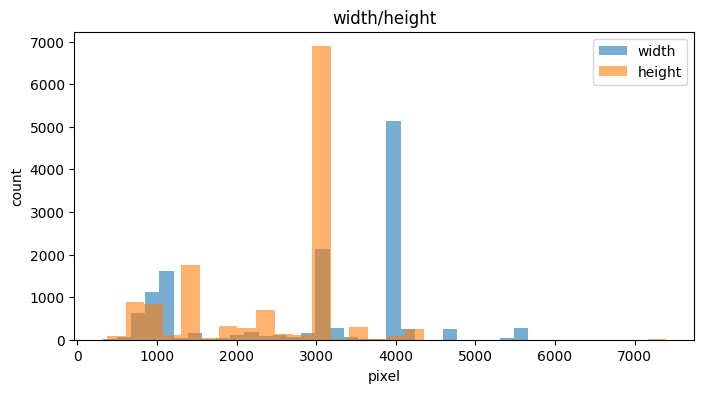

In [10]:
# 4) 해상도 분포
plt.figure(figsize=(8,4))
plt.hist(df["width"], bins=30, alpha=0.6, label="width")
plt.hist(df["height"], bins=30, alpha=0.6, label="height")
plt.legend()
plt.title("width/height")
plt.xlabel("pixel")
plt.ylabel("count")
plt.show()

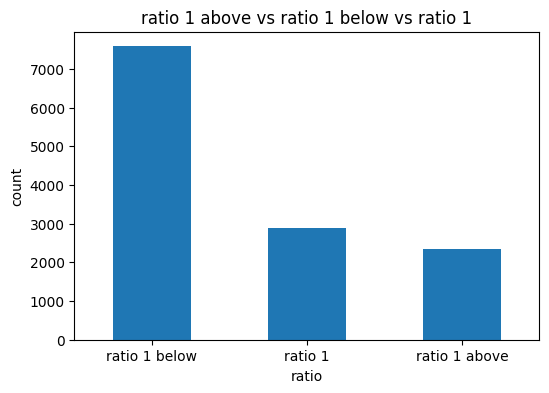

In [13]:
# 5) 방향 분류
def classify(row):
    if row.height > row.width: return "ratio 1 above"
    elif row.width > row.height: return "ratio 1 below"
    else: return "ratio 1"

df["orientation"] = df.apply(classify, axis=1)

# # 6) 방향별 개수 및 막대그래프
# counts = df["orientation"].value_counts()
# print("\n방향별 개수:")
# print(counts)

plt.figure(figsize=(6,4))
counts.plot(kind="bar")
plt.title("ratio 1 above vs ratio 1 below vs ratio 1")
plt.xlabel("ratio")
plt.ylabel("count")
plt.xticks(rotation=0)
plt.show()


방향별 개수:
orientation
ratio 1 below    7586
ratio 1          2878
ratio 1 above    2349
Name: count, dtype: int64


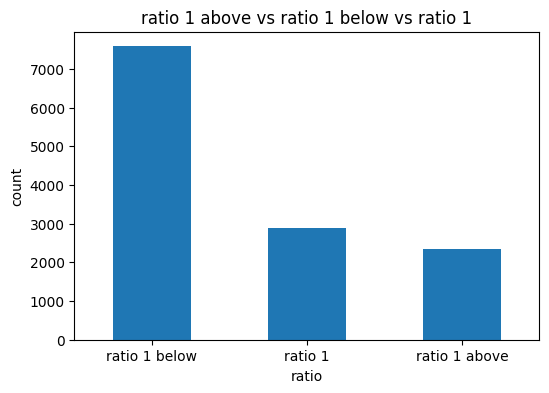

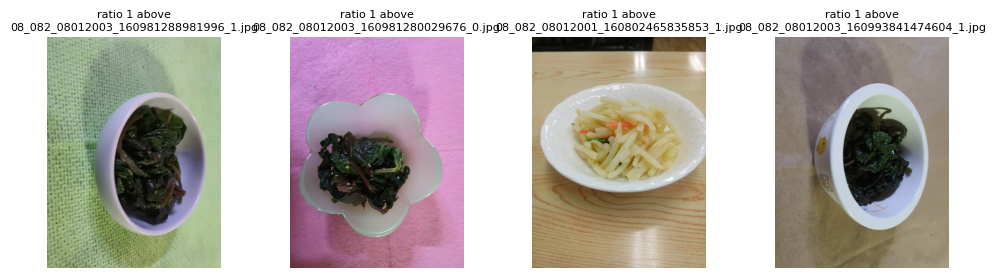

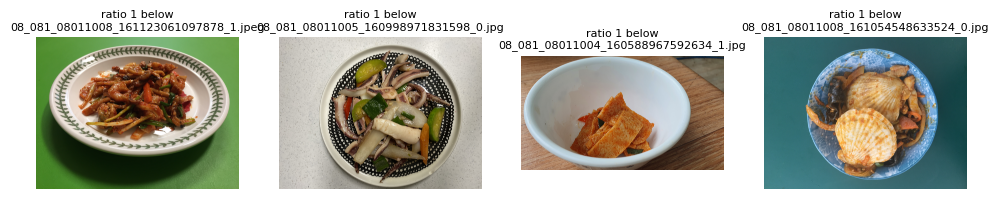

In [ ]:
# 7) 샘플 이미지 확인 (예: portrait/landscape 각 4장)
for ori in ["ratio 1 above","ratio 1 below"]:
    sample = df[df.orientation==ori].sample(min(4, counts[ori]))
    fig, axes = plt.subplots(1, len(sample), figsize=(len(sample)*3,3))
    for ax, (_, r) in zip(axes, sample.iterrows()):
        img = Image.open(image_root / r.filename)
        ax.imshow(img)
        ax.set_title(f"{ori}\n{r.filename}", fontsize=8)
        ax.axis("off")
    plt.show()